# Types of Data
Data comes in many different types, main 2 types:
* Structured - Usually find them in tables, all the samples are typically simular format, i.e CSV - Comma Seperated Values
* Unstructured - Come in many varying formats i.e pictures, audio file

Within those types there is:
* Static Data - Data whos values doesnt change over time i.e spreadsheets
* Streaming Data - Data which is constantly changed over time i.e predicting streaming data based on news headlines. 

In Machine learning you have 3 sets of data:
* Training set - Train your model on this  - 70/80%
* Validation set - Tune your model on this - 10/15%
* Test set - Test and compare on this - 10-15%

**Generalisation**: The ability for a machine learning model to perform well on data it hasnt seen before

In [1]:
import pandas as pd


# 2 main datatypes - series
Properties:
* 1 dimensional

In [3]:
series = pd.Series(["BWM","Toyoya","Honda"])
series

0       BWM
1    Toyoya
2     Honda
dtype: object

In [6]:
colours = pd.Series(["Red","Blue","White"])
colours

0      Red
1     Blue
2    White
dtype: object

#Datatype 2 - DataFrame 
Properties:
* 2 dimensional
* Takes a dictionary

In [8]:
car_data = pd.DataFrame({"Car make": series,"Colour": colours})
car_data

,Car make,Colour
0,BWM,Red
1,Toyoya,Blue
2,Honda,White


##  Importing data
Making a dataframe is tedious, you would rather import data

In [11]:
car_sales = pd.read_csv("car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


## Exporting a dataframe
* Can also export to excel using `to_excel`
* If index = False then it wont export with the index (preferred)

In [14]:
car_sales.to_csv("exported-car-sales.csv", index=False) 

In [15]:
exported_car_sales = pd.read_csv("exported-car-sales.csv")
exported_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


# Describing Data
* Theres many attributes and functions to describe  data

In [17]:
# Attribute
car_sales.dtypes

# Function
# car_sales.to_csv() 

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [19]:
car_columns = car_sales.columns  # Displays the columns of the car
car_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [20]:
car_sales.index  # Displays the amount of index and steps

RangeIndex(start=0, stop=10, step=1)

In [22]:
car_sales.describe()  # Gives statistic information about numerical columns

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [24]:
car_sales.mean() # Calculates mean of numerical columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [26]:
car_sales["Doors"].sum()

40

In [27]:
len(car_sales)

10

# Viewing and selecting data

In [32]:
car_sales.head(1) # Return first row of your data

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"


In [33]:
car_sales.tail(1) # Return last row of your data

,Make,Colour,Odometer (KM),Doors,Price
9,Nissan,White,31600,4,"$9,700.00"


### .loc & .iloc

In [36]:
animals = pd.Series(["cat","dog","bird","panda","snake"],index=[0,3,9,8,3]) # Use index to define custom index
animals

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

In [45]:
animals.loc[3] # loc referes to the index of elements

3      dog
3    snake
dtype: object

In [41]:
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [46]:
# .iloc
animals.iloc[3] #  iloc refers to the real position of elements

'panda'

In [48]:
animals.iloc[:3] # Slicing can be used, give all elements up to index 3

0     cat
3     dog
9    bird
dtype: object

### selecting columns

In [50]:
car_sales["Make"] # Select entire column

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [51]:
car_sales.Make # Works the same as above

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [54]:
car_sales[car_sales["Make"] =="Toyota"] # Boolean indexing (selecting based on condition)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


### Cross tab
aggregating columns together
* useful for comparing columns together


In [55]:
pd.crosstab(car_sales["Make"],car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


### Groupby

Group the data frame on a column based on a certain condition

In [62]:
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


### Plotting data
* Uses matplotlib inline to visualise


In [64]:
import matplotlib.pyplot as plt # if it doesnt work may have to import matplotlib

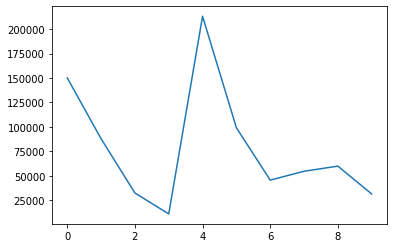

In [63]:
car_sales["Odometer (KM)"].plot()

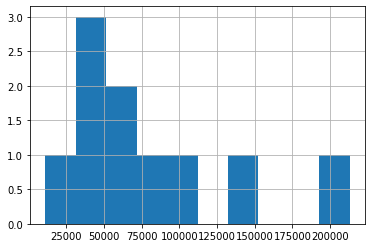

In [65]:
car_sales["Odometer (KM)"].hist()

# Replacing characters in entries in a column
* You can replace characters in all entries in a column using .replace

In [77]:
car_sales['Price'] = car_sales['Price'].replace('[\$\,\.]', '').astype(int)

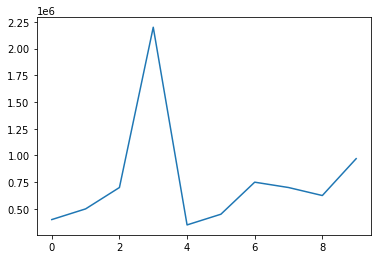

In [82]:
car_sales["Price"].plot() # can now plot the price because its integer

# Manipulating Data

In [87]:
car_sales["Make"] = car_sales["Make"].str.lower() # Anything you can do on strings in python , you can do in columns
car_sales["Make"]

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

## Missing data

In [91]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [95]:
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean()) # use fillna to fill in missing values

0    150043.000000
1     87899.000000
2     92302.666667
3     11179.000000
4    213095.000000
5     92302.666667
6     92302.666667
7     92302.666667
8     60000.000000
9     31600.000000
Name: Odometer, dtype: float64

In [98]:
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(),inplace = True) # Inplace fills in permanently inplace
car_sales_missing.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"


In [103]:
car_sales_missing.dropna() # drops rows with missing values


,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


# Creating data

In [116]:
# Adding columns from series - doesnt need to be same length of existing dataframe
seats_column = pd.Series([5,5,5,5,5])
car_sales["Seats"] = seats_column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,400000,5.0
1,honda,Red,87899,4,500000,5.0
2,toyota,Blue,32549,3,700000,5.0
3,bmw,Black,11179,5,2200000,5.0
4,nissan,White,213095,4,350000,5.0
5,toyota,Green,99213,4,450000,NaN
6,honda,Blue,45698,4,750000,NaN
7,honda,Blue,54738,4,700000,NaN
8,toyota,White,60000,4,625000,NaN
9,nissan,White,31600,4,970000,NaN


In [117]:
car_sales["Seats"].fillna(5,inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,400000,5.0
1,honda,Red,87899,4,500000,5.0
2,toyota,Blue,32549,3,700000,5.0
3,bmw,Black,11179,5,2200000,5.0
4,nissan,White,213095,4,350000,5.0
5,toyota,Green,99213,4,450000,5.0
6,honda,Blue,45698,4,750000,5.0
7,honda,Blue,54738,4,700000,5.0
8,toyota,White,60000,4,625000,5.0
9,nissan,White,31600,4,970000,5.0


In [120]:
# Column from Python list - has to be same length as existing dataframe
fuel_economy = [7.5,9.2,5.0,9.6,8.7,4.7,7.6,8.7,3.0,4.5]
car_sales["Fuel per 100KM"] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM
0,toyota,White,150043,4,400000,5.0,7.5
1,honda,Red,87899,4,500000,5.0,9.2
2,toyota,Blue,32549,3,700000,5.0,5.0
3,bmw,Black,11179,5,2200000,5.0,9.6
4,nissan,White,213095,4,350000,5.0,8.7
5,toyota,Green,99213,4,450000,5.0,4.7
6,honda,Blue,45698,4,750000,5.0,7.6
7,honda,Blue,54738,4,700000,5.0,8.7
8,toyota,White,60000,4,625000,5.0,3.0
9,nissan,White,31600,4,970000,5.0,4.5


In [130]:
car_sales["Total fuel used (L)"] = car_sales["Odometer (KM)"]/100*car_sales["Fuel per 100KM"]
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Total fuel used
0,toyota,White,150043,4,400000,5.0,7.5,11253.225,11253.225
1,honda,Red,87899,4,500000,5.0,9.2,8086.708,8086.708
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450,1627.450
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184,1073.184
4,nissan,White,213095,4,350000,5.0,8.7,18539.265,18539.265
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011,4663.011
6,honda,Blue,45698,4,750000,5.0,7.6,3473.048,3473.048
7,honda,Blue,54738,4,700000,5.0,8.7,4762.206,4762.206
8,toyota,White,60000,4,625000,5.0,3.0,1800.000,1800.000
9,nissan,White,31600,4,970000,5.0,4.5,1422.000,1422.000


# Dropping a column

In [131]:
# Dropping a column
car_sales.drop("Total fuel used",axis=1,inplace= True) # Columns are always axis 1
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L)
0,toyota,White,150043,4,400000,5.0,7.5,11253.225
1,honda,Red,87899,4,500000,5.0,9.2,8086.708
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184
4,nissan,White,213095,4,350000,5.0,8.7,18539.265
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011
6,honda,Blue,45698,4,750000,5.0,7.6,3473.048
7,honda,Blue,54738,4,700000,5.0,8.7,4762.206
8,toyota,White,60000,4,625000,5.0,3.0,1800.000
9,nissan,White,31600,4,970000,5.0,4.5,1422.000


# Sample (randomizing indexes)
* used to shuffle - mix up the indexes
* useful in machine learning where data in order could affect training the model

In [138]:
car_sales_shuffled = car_sales.sample(frac=1) # fraction = 1 means the whole data, 0.5 means half the data
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L)
9,nissan,White,31600,4,970000,5.0,4.5,1422.000
7,honda,Blue,54738,4,700000,5.0,8.7,4762.206
6,honda,Blue,45698,4,750000,5.0,7.6,3473.048
0,toyota,White,150043,4,400000,5.0,7.5,11253.225
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011
8,toyota,White,60000,4,625000,5.0,3.0,1800.000
4,nissan,White,213095,4,350000,5.0,8.7,18539.265
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450
1,honda,Red,87899,4,500000,5.0,9.2,8086.708


In [149]:
car_sales_shuffled.reset_index(drop=True) # resets the index doesnt save the shuffled index with drop


,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L)
0,nissan,White,31600,4,970000,5.0,4.5,1422.000
1,honda,Blue,54738,4,700000,5.0,8.7,4762.206
2,honda,Blue,45698,4,750000,5.0,7.6,3473.048
3,toyota,White,150043,4,400000,5.0,7.5,11253.225
4,toyota,Green,99213,4,450000,5.0,4.7,4663.011
5,toyota,White,60000,4,625000,5.0,3.0,1800.000
6,nissan,White,213095,4,350000,5.0,8.7,18539.265
7,bmw,Black,11179,5,2200000,5.0,9.6,1073.184
8,toyota,Blue,32549,3,700000,5.0,5.0,1627.450
9,honda,Red,87899,4,500000,5.0,9.2,8086.708


In [150]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L)
0,toyota,White,150043,4,400000,5.0,7.5,11253.225
1,honda,Red,87899,4,500000,5.0,9.2,8086.708
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184
4,nissan,White,213095,4,350000,5.0,8.7,18539.265


In [152]:
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].apply(lambda x: x/1.6) # lambda means apply an anonymous function where x = x/1.6
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L)
0,toyota,White,58610.546875,4,400000,5.0,7.5,11253.225
1,honda,Red,34335.546875,4,500000,5.0,9.2,8086.708
2,toyota,Blue,12714.453125,3,700000,5.0,5.0,1627.450
3,bmw,Black,4366.796875,5,2200000,5.0,9.6,1073.184
4,nissan,White,83240.234375,4,350000,5.0,8.7,18539.265
5,toyota,Green,38755.078125,4,450000,5.0,4.7,4663.011
6,honda,Blue,17850.781250,4,750000,5.0,7.6,3473.048
7,honda,Blue,21382.031250,4,700000,5.0,8.7,4762.206
8,toyota,White,23437.500000,4,625000,5.0,3.0,1800.000
9,nissan,White,12343.750000,4,970000,5.0,4.5,1422.000
